In [ ]:

import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv(r"C:\Users\Vedant\Downloads\titanic.csv")
print(df.columns)
print(df.head())


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Gender'] = df['Sex'].map({'male': 0, 'female': 1})
df.drop(['Sex'], axis=1, inplace=True)
print(df.head())


In [24]:
hc = HillClimbSearch(df)
model = hc.estimate(scoring_method=BicScore(df))
bayes_net = BayesianNetwork(model.edges())
bayes_net.fit(df)


  0%|          | 8/1000000 [00:00<25:13:14, 11.01it/s] 


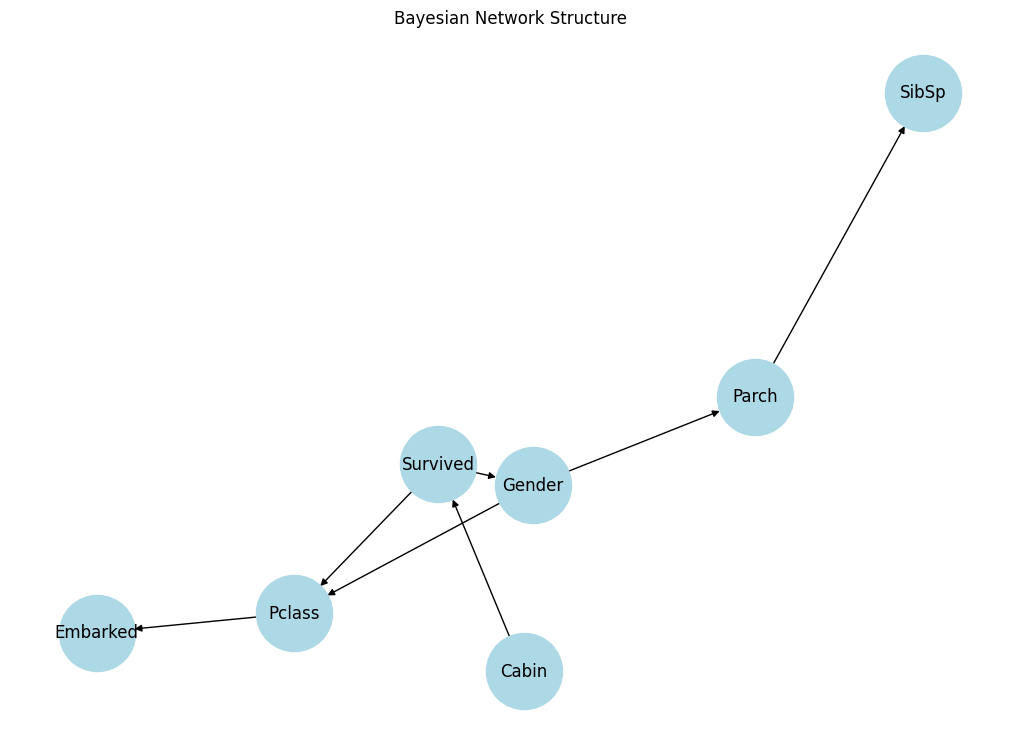

In [ ]:
nx_graph = nx.DiGraph(bayes_net.edges())  # Convert the network to a NetworkX directed graph
plt.figure(figsize=(10, 7))
nx.draw(nx_graph, with_labels=True, node_size=3000, font_size=12, node_color='lightblue')
plt.title('Bayesian Network Structure')
plt.show()


In [28]:
inference = VariableElimination(bayes_net)
query_result = inference.query(
    variables=['Survived'],  # Variable to infer
    evidence={'Gender': 1, 'Pclass': 2, 'SibSp': 1, 'Embarked': 'C'}  # Example evidence
)
print(query_result)


+-------------+-----------------+
| Survived    |   phi(Survived) |
+=============+=================+
| Survived(0) |          0.0260 |
+-------------+-----------------+
| Survived(1) |          0.9740 |
+-------------+-----------------+
